<a href="https://colab.research.google.com/github/U-Harshitha/ROI-Python-DataAnalysis/blob/main/Tejasree_BHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
bhp = pd.read_csv("BHP.csv")
bhp.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
bhp.shape

(13320, 9)

In [10]:
bhp.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [21]:
bhp2 = bhp.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
bhp2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [23]:
bhp2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [34]:
bhp2.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [35]:
bhp2['bath'].fillna(bhp2['bath'].mean(), inplace = True)
bhp2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [36]:
bhp2.shape

(13320, 5)

In [40]:
bhp3 = bhp2.dropna()
print(bhp3.isnull().sum())
print(bhp3.shape)

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64
(13303, 5)


In [42]:
bhp3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [43]:
bhp3['bhk'] = bhp3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-43-316269d2fda8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhp3['bhk'] = bhp3['size'].apply(lambda x: int(x.split(' ')[0]))


In [44]:
bhp3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [45]:
bhp3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [50]:
del bhp3['size']

In [51]:
bhp3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [52]:
bhp3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [53]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [57]:
bhp3[bhp3['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [59]:
bhp3[~bhp3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.00000,186.000,4
56,Devanahalli,3010 - 3410,2.69261,192.000,4
81,Hennur Road,2957 - 3450,2.69261,224.500,4
122,Hebbal,3067 - 8156,4.00000,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.00000,54.005,2
165,Sarjapur,1145 - 1340,2.00000,43.490,2
188,KR Puram,1015 - 1540,2.00000,56.800,2
224,Devanahalli,1520 - 1740,2.69261,74.820,3
410,Kengeri,34.46Sq. Meter,1.00000,18.500,1
549,Hennur Road,1195 - 1440,2.00000,63.770,2


In [60]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [62]:
convert_sqft_to_num('34.46Sq. Meter')

In [63]:
bhp4 = bhp3.copy()

In [64]:
bhp4['total_sqft'] = bhp4['total_sqft'].apply(convert_sqft_to_num)

In [71]:
bhp4 = bhp4[bhp4.total_sqft.notnull()]

In [72]:
bhp4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [73]:
bhp4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [74]:
bhp4.shape

(13257, 5)

In [68]:
bhp5 = bhp4.copy()

In [69]:
bhp5['price_per_sqft'] = bhp5['price'] * 10000 / bhp5['total_sqft']

In [70]:
bhp5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,624.589086
4,Kothanur,1200.0,2.0,51.00,2,425.000000


In [76]:
bhp5_stats = bhp5['price_per_sqft'].describe()

In [77]:
bhp5.location = bhp5.location.apply(lambda x: x.strip())

In [78]:
location_stats = bhp5['location'].value_counts(ascending=False)
location_stats

Whitefield                        540
Sarjapur  Road                    397
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [79]:
location_stats.values.sum()

13303

In [80]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [81]:
len(bhp5.location.unique())

1293

In [83]:
bhp5.location = bhp5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(bhp5.location.unique())

242

In [85]:
bhp5[bhp5.total_sqft/bhp5.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,1066.098081
68,Devarachikkanahalli,1350.0,7.0,85.0,8,629.629630
70,other,500.0,3.0,100.0,3,2000.000000


In [86]:
bhp5.shape

(13303, 6)

In [88]:
bhp5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,624.589086
4,Kothanur,1200.0,2.0,51.00,2,425.000000


In [89]:
bhp6 = bhp5[~(bhp5.total_sqft / bhp5.bhk < 300)]
bhp6.shape

(12559, 6)

In [90]:
bhp6.price_per_sqft.describe()

count    12513.000000
mean       630.744164
std        416.093161
min         26.782981
25%        421.052632
50%        529.500756
75%        691.666667
max      17647.058824
Name: price_per_sqft, dtype: float64

In [92]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
bhp7 = remove_pps_outliers(bhp6)
bhp7.shape

(10286, 6)

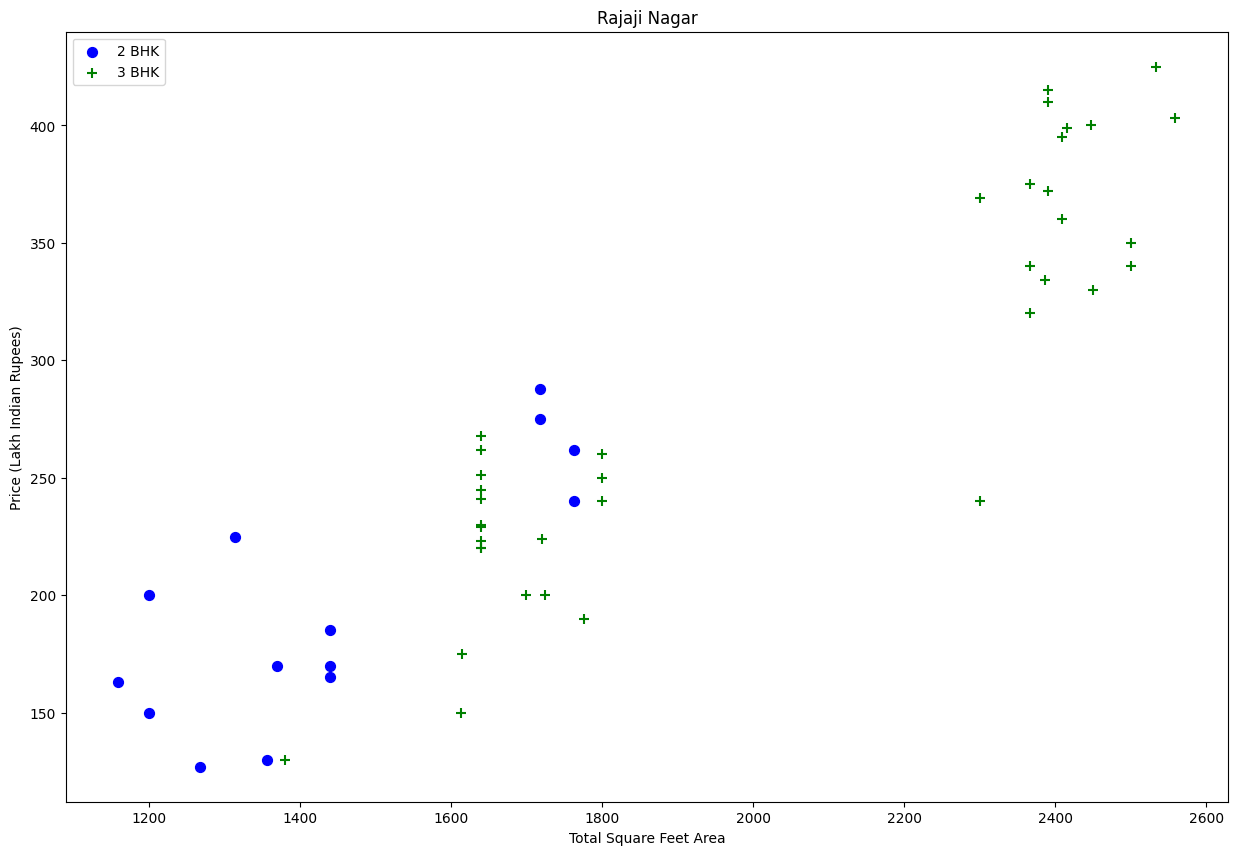

In [93]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(bhp7,"Rajaji Nagar")

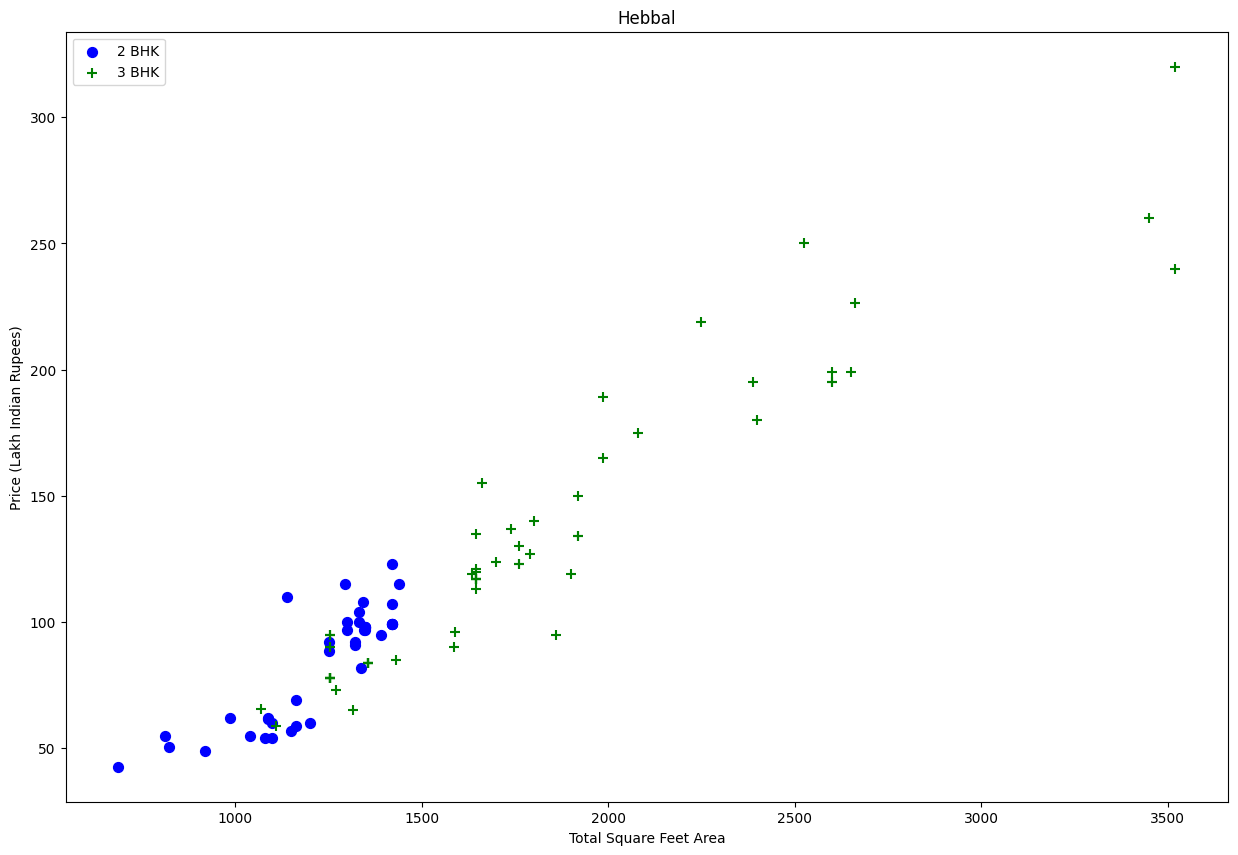

In [95]:
plot_scatter_chart(bhp7,"Hebbal")

In [96]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
bhp8 = remove_bhk_outliers(bhp7)
bhp8.shape

(7353, 6)

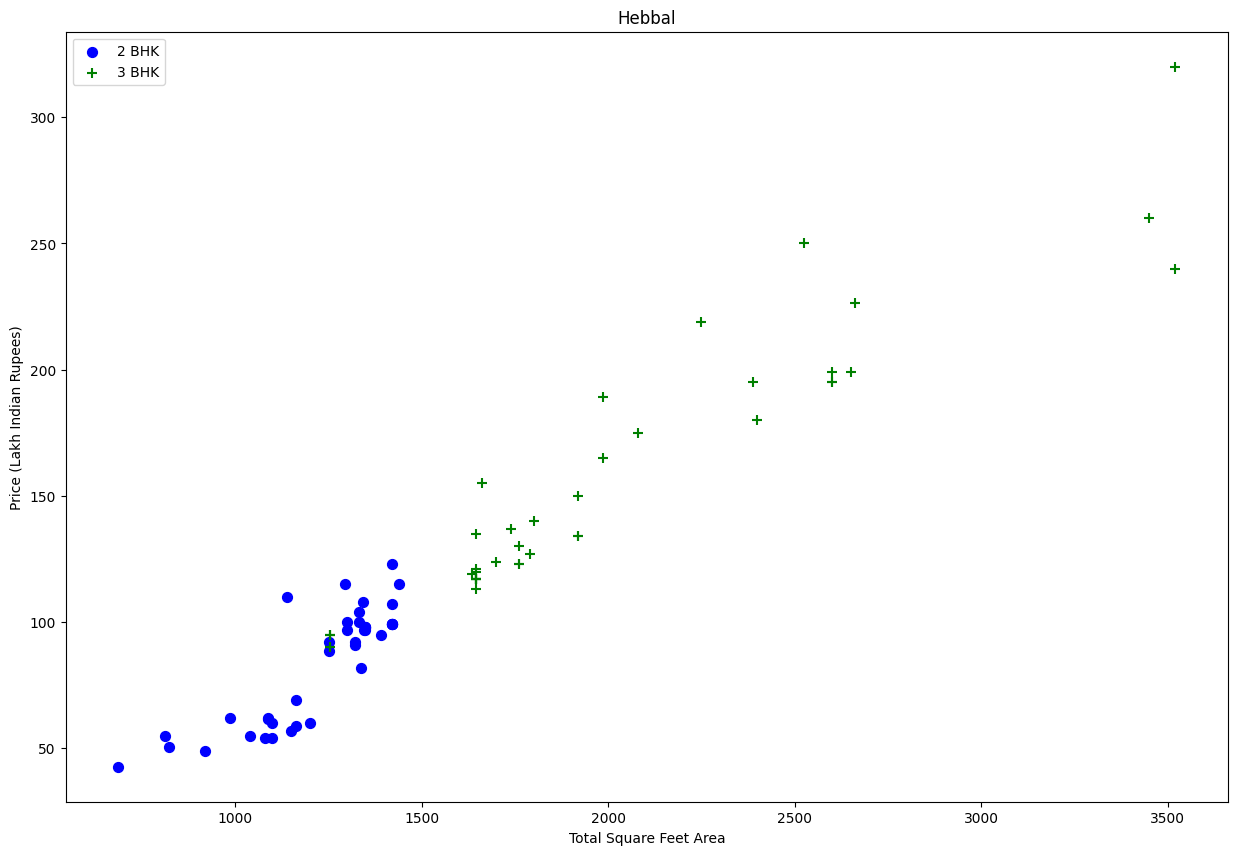

In [98]:
plot_scatter_chart(bhp8,"Hebbal")

Text(0, 0.5, 'Count')

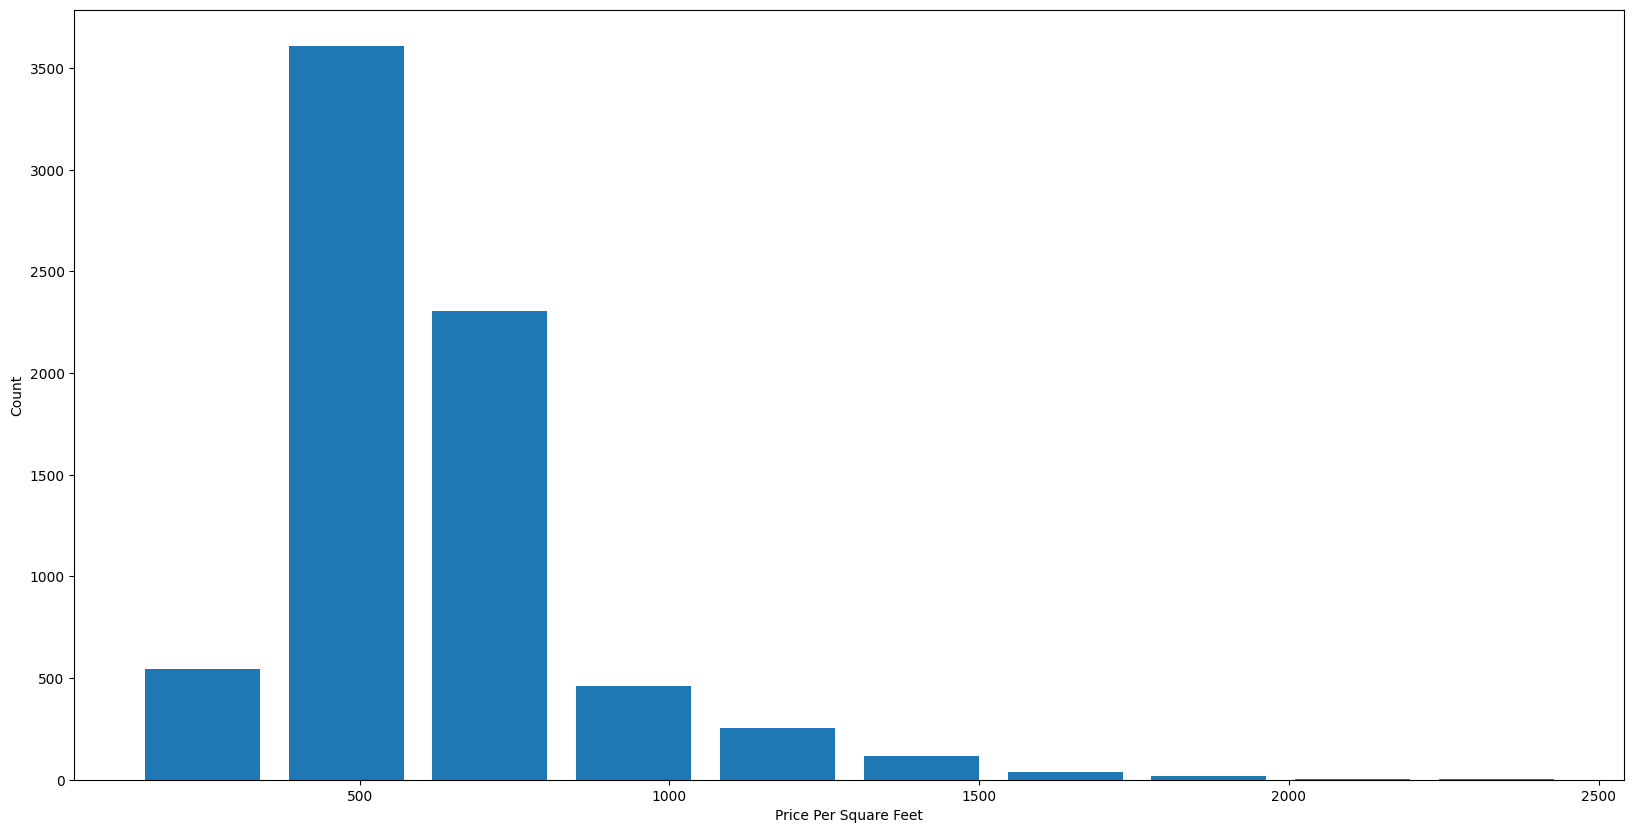

In [100]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(bhp8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [101]:
bhp8.bath.unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  2.69260965,  7.        ,  9.        ,
       12.        , 16.        , 13.        ])

Text(0, 0.5, 'Count')

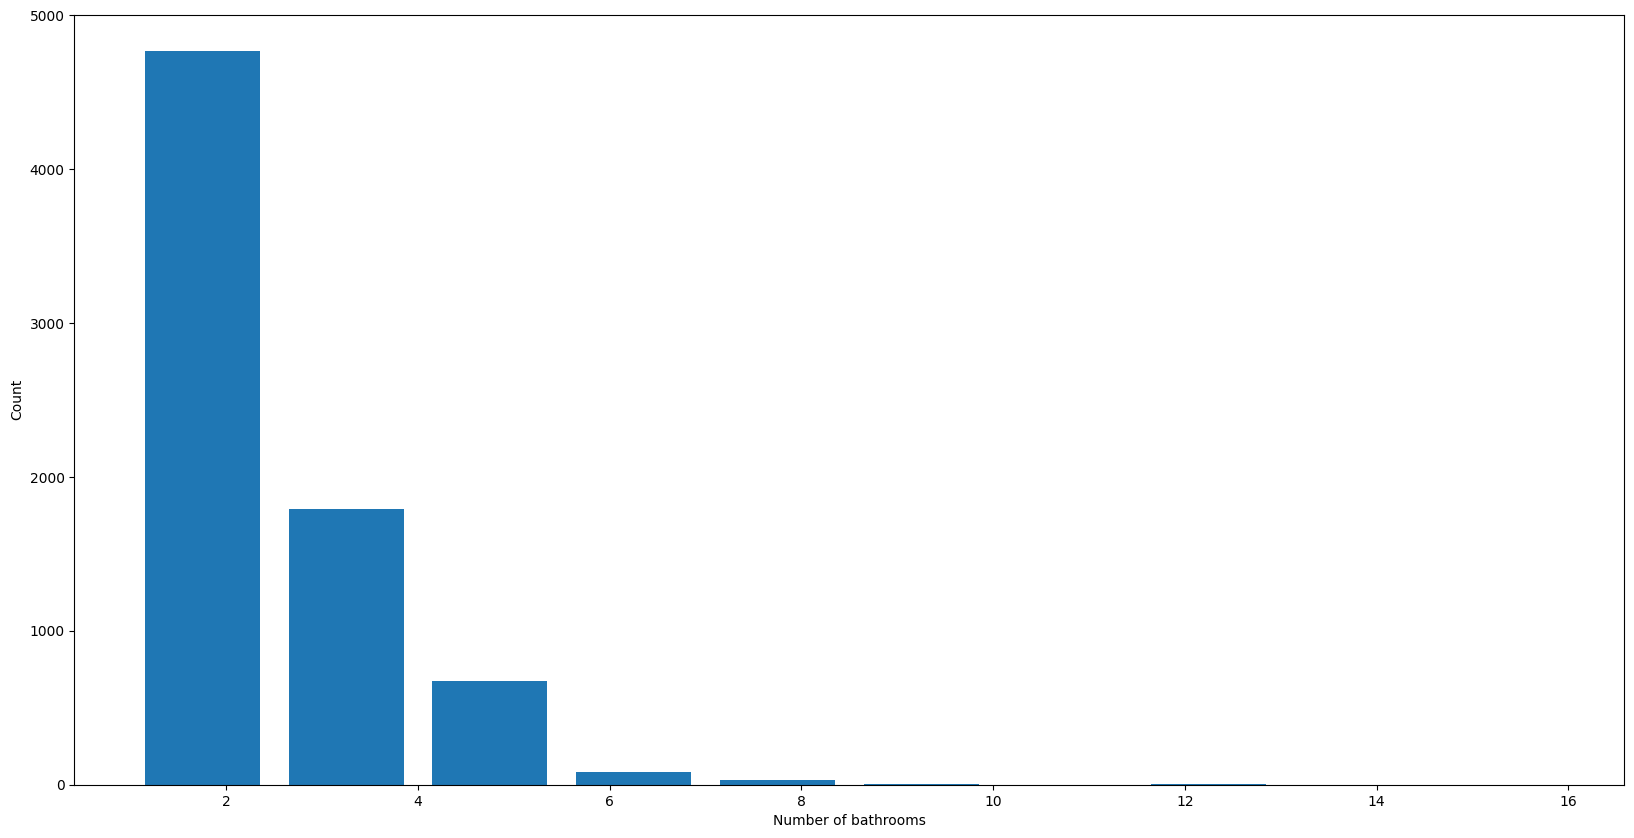

In [102]:
plt.hist(bhp8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [103]:
bhp8[bhp8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5306,Neeladri Nagar,4000.0,12.0,160.0,10,400.000000
8530,other,12000.0,12.0,525.0,10,437.500000
8619,other,10000.0,16.0,550.0,16,550.000000
9352,other,6000.0,12.0,150.0,11,250.000000
9683,other,5425.0,13.0,275.0,13,506.912442


In [104]:
bhp8[bhp8.bath>bhp8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,2460.0,7.0,80.0,4,325.203252
5267,Nagasandra,7000.0,8.0,450.0,4,642.857143
6748,Thanisandra,1806.0,6.0,116.0,3,642.303433
8455,other,11338.0,9.0,1000.0,6,881.989769


In [105]:
bhp9 = bhp8[bhp8.bath<bhp8.bhk+2]
bhp9.shape

(7275, 6)

In [107]:
bhp10 = bhp9.drop(['price_per_sqft'],axis='columns')

In [108]:
dummies = pd.get_dummies(bhp10.location)

In [109]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
bhp11 = pd.concat([bhp10, dummies.drop('other', axis='columns')], axis='columns')
bhp11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
bhp12 = bhp11.drop('location',axis='columns')

In [119]:
bhp12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X = bhp12.drop(['price'],axis='columns')

In [121]:
X.shape

(7275, 244)

In [122]:
y = bhp12.price

In [123]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [124]:
len(y)

7275

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 40)

In [141]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7823022834369213

In [142]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [143]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.07540505928341

In [144]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.72254472157942

In [145]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.00389664979866

In [146]:
predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.6510363120947